In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [3]:
dataset = pd.read_csv('../../Results/Asteroid_Updated.csv', low_memory=False)
print(dataset.shape)
dataset.head()

(839714, 31)


name         a         e          i          om           w         q  \
0    Ceres  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1   Pallas  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2     Juno  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3    Vesta  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4  Astraea  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T     G     moid  \
0  2.979647  4.608202    8822.0  ...  0.426 NaN       C      G  0.12  1.59478   
1  3.411067  4.616444   72318.0  ...  0.284 NaN       B      B  0.11  1.23324   
2  3.354967  4.360814   72684.0  ...  0.433 NaN      Sk      S  0.32  1.03454   
3  2.570926  3.628837   24288.0  ...  0.492 NaN       V      V  0.32  1.13948   
4  3.066174  4.130323   63507.0  ...  0.411 NaN       S      S   NaN  1.09589   

  class         n          per          ma  
0   MBA  0.213885  1683.145708   77.372096  
1   MBA  0.213503  1686.155999   59.699133  
2   MBA  0.226019  1592.787285   34.925016  
3   MBA  0.271609  1325.432765   95.861936  
4   MBA  0.238632  1508.600458  282.366289  

[5 rows x 31 columns]

In [4]:
print(dataset.columns)
dataset.isnull().sum()

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')


name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [5]:
#L'amico sull internet mi dice di selezionare solo poche features...

lst_features = [ 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'H', 'neo', 'pha', 'moid', 'n', 'per', 'ma']
data_sel = dataset[lst_features]


In [6]:
# Controllo i nan

print(f"Numero totale di nan = {data_sel.isnull().sum().sum()}")
print("Numero di nun per colonne:")
print(data_sel.isnull().sum())


Numero totale di nan = 35604
Numero di nun per colonne:
a            2
e            0
i            0
om           0
w            0
q            0
ad           6
per_y        1
H         2689
neo          6
pha      16442
moid     16442
n            2
per          6
ma           8
dtype: int64


In [7]:
# Rimuovo i nan
df = data_sel.dropna()

# Quanti dati ho tolto?
print(f"Tolgo i nan: {data_sel.shape[0]} - {df.shape[0]} = {data_sel.shape[0]-df.shape[0]}")
print(f"Percentuale di dati rimossi escludendo i nan --> {100-data_sel.shape[0]/df.shape[0]*100:.2f}%")



Tolgo i nan: 839714 - 820572 = 19142
Percentuale di dati rimossi escludendo i nan --> -2.33%


In [8]:
# La ground truth è contenuta nella colonna 'pha' = possibily hazardous asteroids

print(f"Numero di colonna di 'pha' = {df.columns.get_loc('pha')}")
print(f"Valori unici di 'pha' --> \n {df['pha'].unique()} ")
print("")

tot_data = len(df['pha'])


tot_n = sum(df['pha'] == 'N')
percent_n = tot_n/tot_data*100

tot_y = sum(df['pha'] == 'Y')
percent_y = tot_y/tot_data*100


print(f"Pha = 'N' --> {tot_n } su {tot_data} => {percent_n:.2f}%")
print(f"Pha = 'Y' --> {tot_y } su {tot_data} => {percent_y:.2f}%")


Numero di colonna di 'pha' = 10
Valori unici di 'pha' --> 
 ['N' 'Y'] 

Pha = 'N' --> 818557 su 820572 => 99.75%
Pha = 'Y' --> 2015 su 820572 => 0.25%


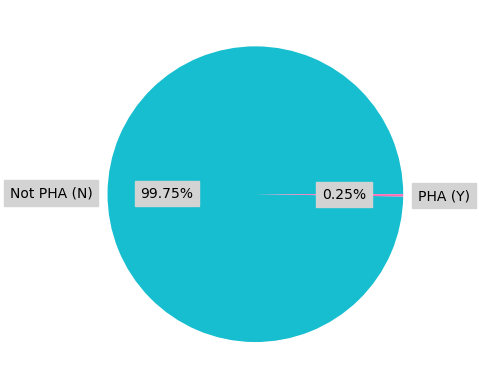

In [9]:
# Pie chart --> Terribile idea :)

fig, ax = plt.subplots()

ax.pie([tot_n, tot_y], labels = ("Not PHA (N)", "PHA (Y)"), autopct='%1.2f%%',
       colors = ("tab:cyan", "hotpink"), textprops = {"color":"k", "backgroundcolor":"lightgrey"})

fig.savefig("../Relazione/Grafici/PieChart.eps", format = "eps", bbox_inches = "tight")

plt.show()

In [10]:
print(f"Numero di colonna di 'neo' = {df.columns.get_loc('neo')}")
print(f"Valori unici di 'neo' --> {df['neo'].unique()} ")
print("")
print(f"Neo = 'N' --> {sum(df['neo'] == 'N')} su {len(df['neo'])} => {sum(df['neo'] == 'N')/len(df['neo'])*100:.2f}%")
print(f"Neo = 'Y' --> {sum(df['neo'] == 'Y')} su {len(df['neo'])} => {sum(df['neo'] == 'Y')/len(df['neo'])*100:.2f}%")


Numero di colonna di 'neo' = 9
Valori unici di 'neo' --> ['N' 'Y'] 

Neo = 'N' --> 799175 su 820572 => 97.39%
Neo = 'Y' --> 21397 su 820572 => 2.61%


In [11]:
df.dtypes

a        float64
e        float64
i        float64
om       float64
w        float64
q        float64
ad       float64
per_y    float64
H        float64
neo       object
pha       object
moid     float64
n        float64
per      float64
ma       float64
dtype: object

In [12]:
string_col = df.select_dtypes(include="object").columns
df[string_col]=df[string_col].astype("string")

C:\Users\utente\AppData\Local\Temp\ipykernel_4872\2273451089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[string_col]=df[string_col].astype("string")


In [13]:
df.describe().T


count         mean           std           min          25%  \
a      820572.0     2.898891      6.871649  5.552760e-01     2.385106   
e      820572.0     0.155911      0.094183  0.000000e+00     0.091633   
i      820572.0     8.921652      6.653017  7.545953e-03     4.047468   
om     820572.0   168.505242    103.133115  3.882104e-04    80.095485   
w      820572.0   181.052265    104.052640  1.665763e-03    90.993832   
q      820572.0     2.406323      2.253283  7.051073e-02     1.971288   
ad     820572.0     3.391458     12.883577  7.736836e-01     2.775567   
per_y  820572.0     6.906273    255.144718  4.137820e-01     3.683576   
H      820572.0    16.772021      1.832444 -1.100000e+00    15.900000   
moid   820572.0     1.423443      2.250500  3.437640e-07     0.978741   
n      820572.0     0.237541      0.081461  5.871097e-06     0.190102   
per    820572.0  2522.516225  93191.608248  1.511339e+02  1345.426196   
ma     820572.0   180.687500    106.351059 -6.713683e+01    86.989416   

               50%          75%           max  
a         2.643858     2.995560  3.043149e+03  
e         0.143798     0.199500  9.985357e-01  
i         7.224511    12.227250  1.751887e+02  
om      160.488951   252.124855  3.599998e+02  
w       181.587164   271.533605  3.599998e+02  
q         2.224474     2.577480  8.042417e+01  
ad        3.037667     3.358084  6.081842e+03  
per_y     4.298979     5.184718  1.678777e+05  
H        16.800000    17.600000  3.320000e+01  
moid      1.237875     1.590340  7.950130e+01  
n         0.229270     0.267573  2.381994e+00  
per    1570.202011  1893.718431  6.131733e+07  
ma      181.871997   274.053392  4.916180e+02

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 820572 entries, 0 to 839713
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   a       820572 non-null  float64
 1   e       820572 non-null  float64
 2   i       820572 non-null  float64
 3   om      820572 non-null  float64
 4   w       820572 non-null  float64
 5   q       820572 non-null  float64
 6   ad      820572 non-null  float64
 7   per_y   820572 non-null  float64
 8   H       820572 non-null  float64
 9   neo     820572 non-null  string 
 10  pha     820572 non-null  string 
 11  moid    820572 non-null  float64
 12  n       820572 non-null  float64
 13  per     820572 non-null  float64
 14  ma      820572 non-null  float64
dtypes: float64(13), string(2)
memory usage: 100.2 MB


In [15]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if df[i].dtype == 'string':
        categorical_features.append(i)

    else:
        numerical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : neo pha
Numerical Features : a e i om w q ad per_y H moid n per ma


In [16]:
le = LabelEncoder()
y = le.fit_transform(df['pha'])

df = df.drop("pha", axis = 1)


In [17]:
label= le.fit_transform(df['neo'])
df['neo'] = label



In [18]:
df

a         e          i          om           w         q  \
0       2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1       2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2       2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3       2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4       2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   
...          ...       ...        ...         ...         ...       ...   
839709  2.812945  0.664688   4.695700  183.310012  234.618352  0.943214   
839710  2.645238  0.259376  12.574937    1.620020  339.568072  1.959126   
839711  2.373137  0.202053   0.732484  176.499082  198.026527  1.893638   
839712  2.260404  0.258348   9.661947  204.512448  148.496988  1.676433   
839713  2.546442  0.287672   5.356238   70.709555  273.483265  1.813901   

              ad     per_y       H  neo      moid         n          per  \
0       2.979647  4.608202   3.340    0  1.594780  0.213885  1683.145708   
1       3.411067  4.616444   4.130    0  1.233240  0.213503  1686.155999   
2       3.354967  4.360814   5.330    0  1.034540  0.226019  1592.787285   
3       2.570926  3.628837   3.200    0  1.139480  0.271609  1325.432765   
4       3.066174  4.130323   6.850    0  1.095890  0.238632  1508.600458   
...          ...       ...     ...  ...       ...       ...          ...   
839709  4.682676  4.717914  20.400    1  0.032397  0.208911  1723.217927   
839710  3.331350  4.302346  17.507    0  0.956145  0.229090  1571.431965   
839711  2.852636  3.655884  18.071    0  0.893896  0.269600  1335.311579   
839712  2.844376  3.398501  18.060    0  0.680220  0.290018  1241.302609   
839713  3.278983  4.063580  17.406    0  0.815280  0.242551  1484.222588   

                ma  
0        77.372096  
1        59.699133  
2        34.925016  
3        95.861936  
4       282.366289  
...            ...  
839709  156.905910  
839710   13.366251  
839711  355.351127  
839712   15.320134  
839713   20.432959  

[820572 rows x 14 columns]

In [19]:
col = list(df.columns)

df.to_csv("../Dataset/Dati_df",index=False)

X = df.to_numpy()

df.shape

(820572, 14)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


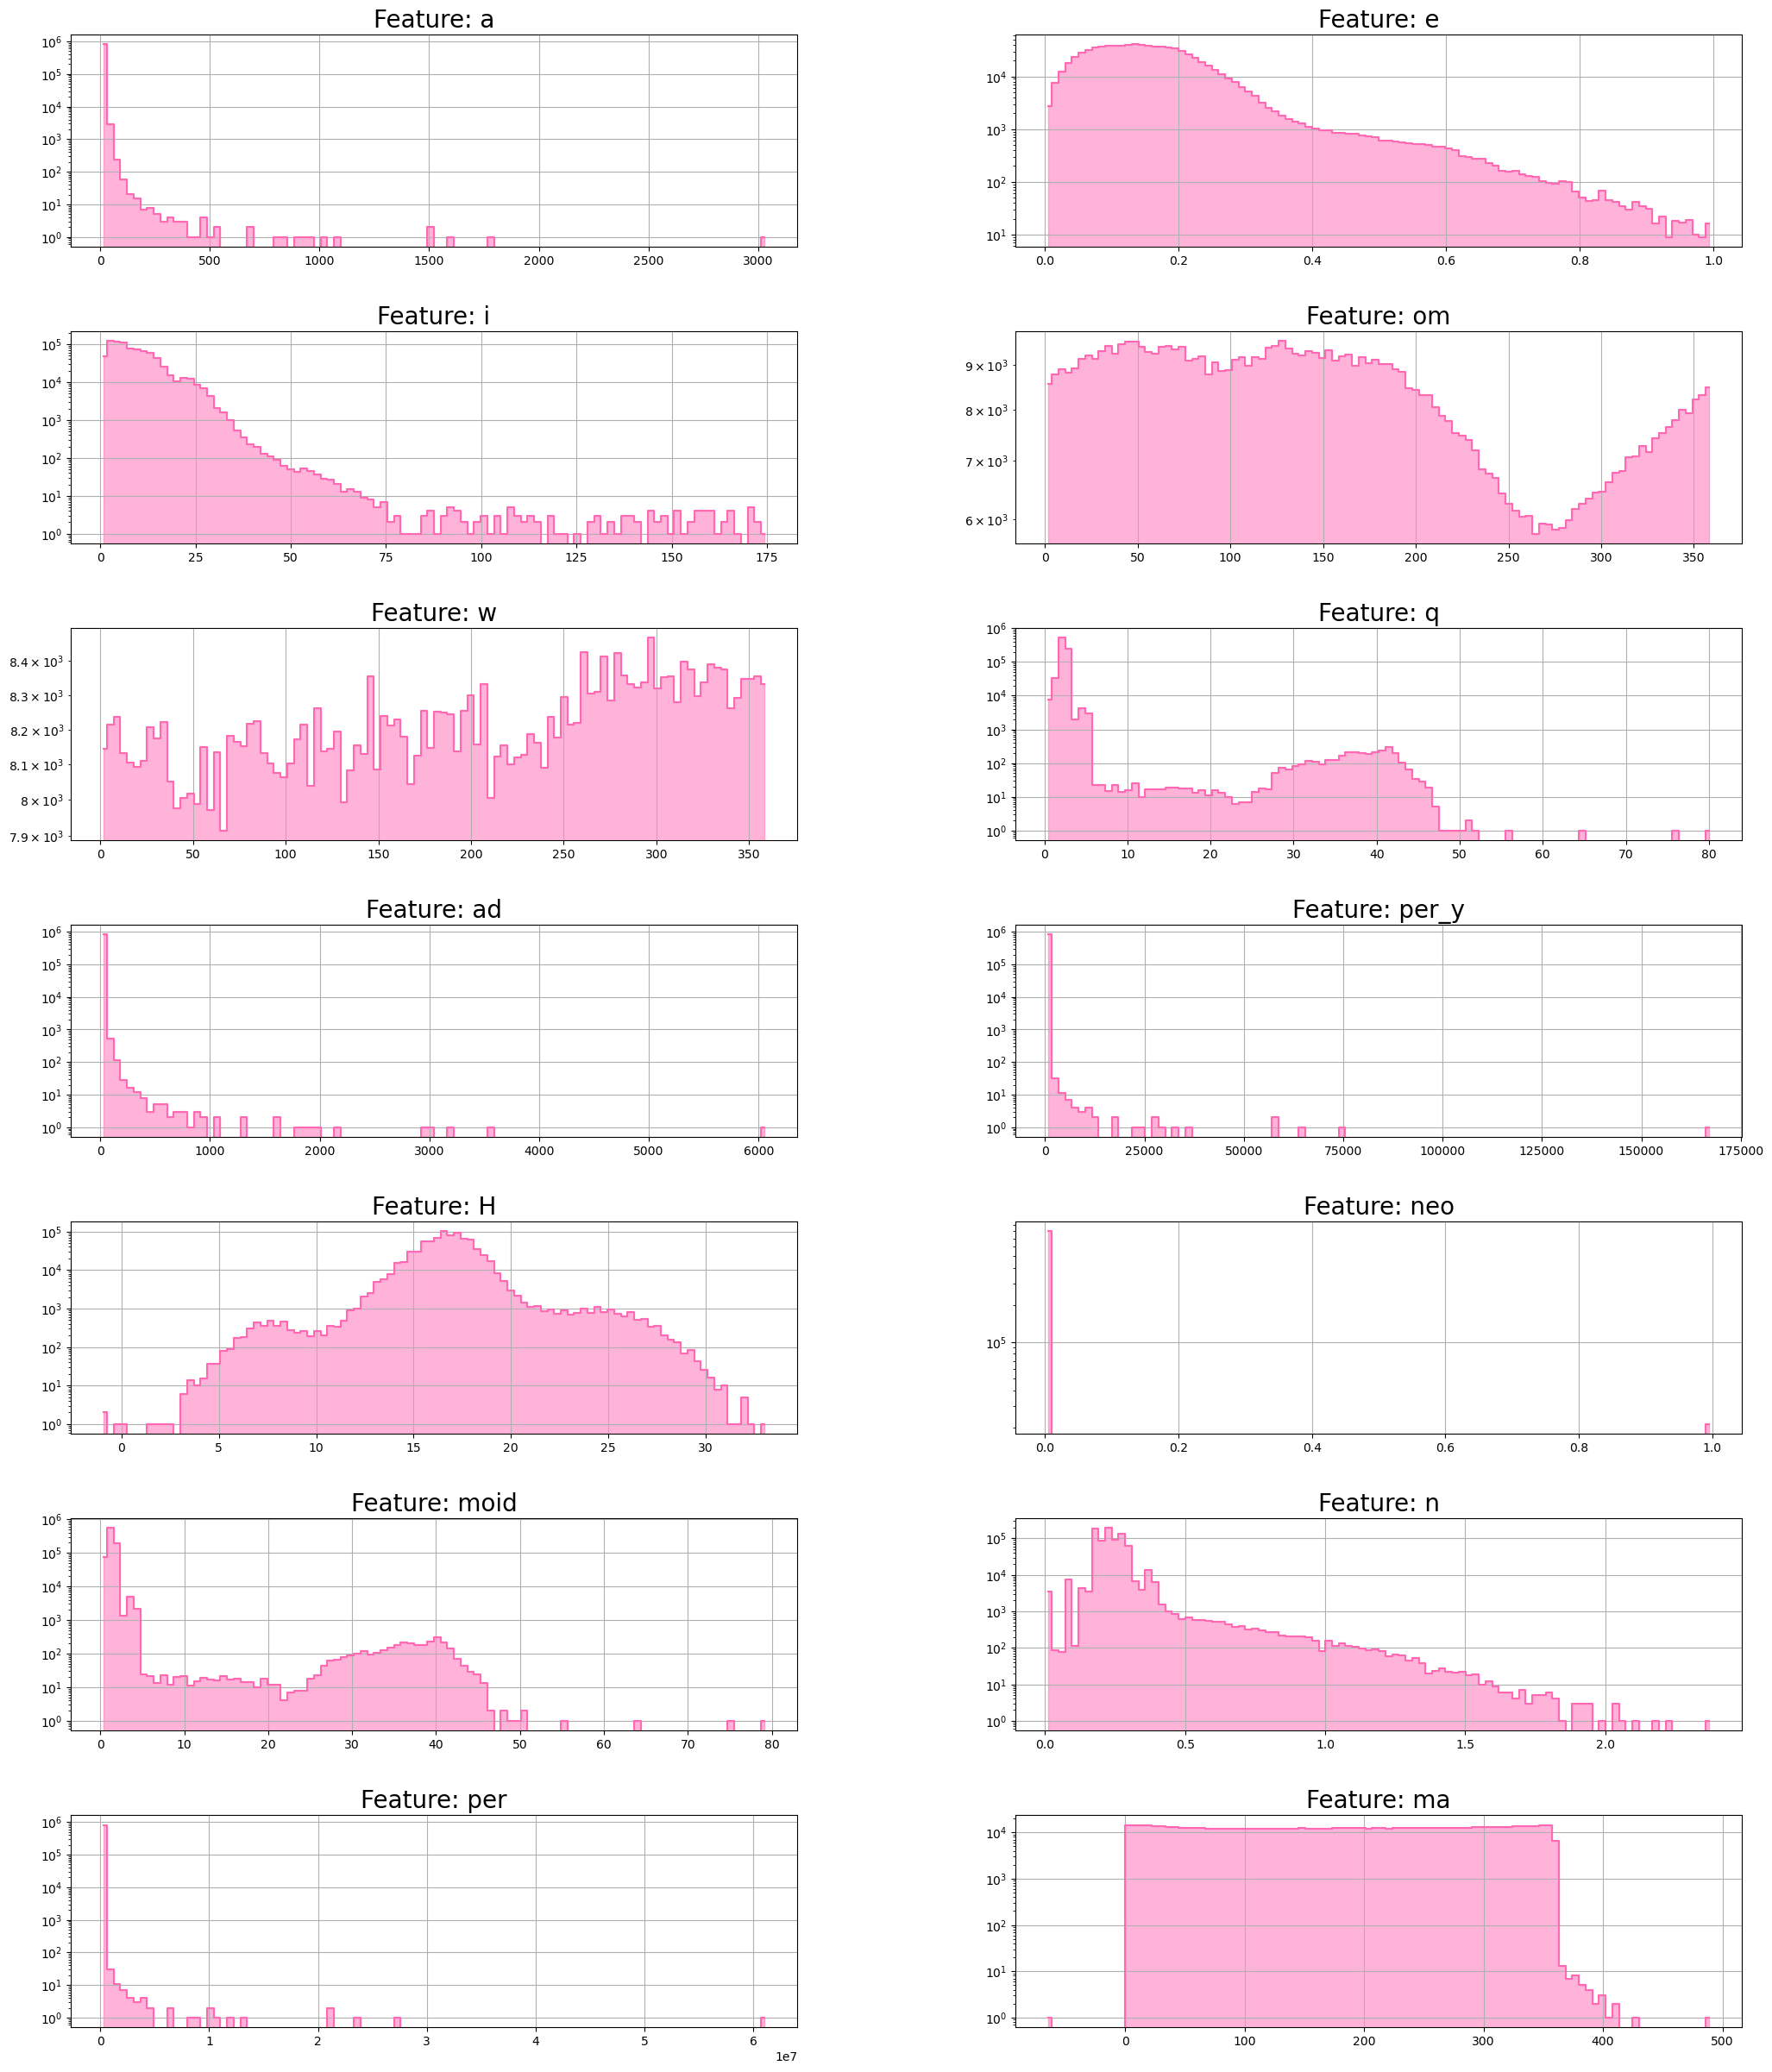

In [20]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(25,30)
fig.subplots_adjust(hspace = .4, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h, ds = "steps-mid", label = "", c = "hotpink")
    ax[i].fill_between(binc, h, step = "mid", color = "hotpink", alpha = 0.5)
    
    ax[i].set_yscale("log")
    

    
    
    ax[i].grid()
    #ax[i].legend()
    ax[i].set_title(f"Feature: {col[i]}", fontsize = 20)
    

fig.savefig("../Relazione/Grafici/DistrFeatures.eps", format = "eps")

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


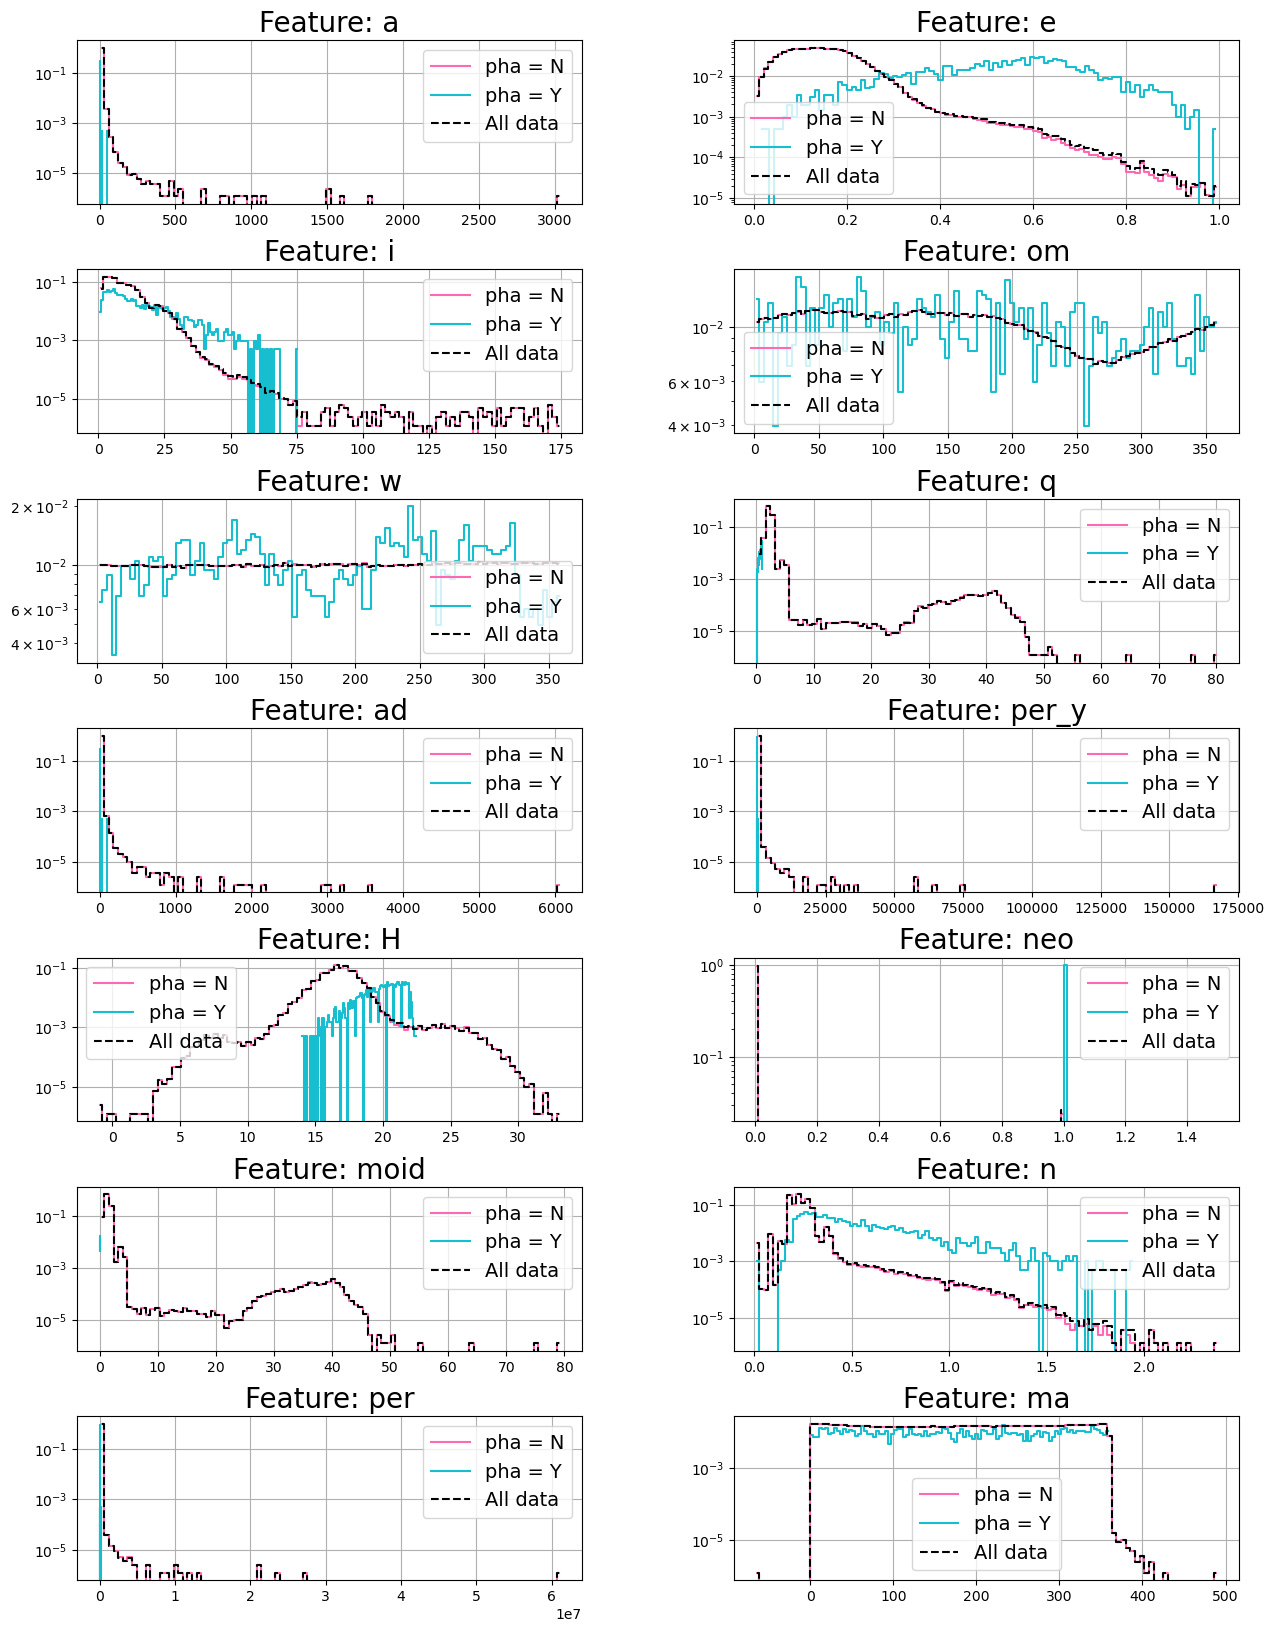

In [26]:
fig, ax = plt.subplots(7, 2)
fig.set_size_inches(15,20)
fig.subplots_adjust(hspace = .4, wspace = .3)
ax = ax.flatten()

for i in range(X.shape[1]):
    h, bins = np.histogram(X[:,i][y==0], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "pha = N", c = "hotpink")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    h, bins = np.histogram(X[:,i][y==1], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "pha = Y", c = "tab:cyan")
    #ax[i].fill_between(binc, h, step = "mid", color = "lime", alpha = 1)
    
    h, bins = np.histogram(X[:,i], bins = 100)
    binc = bins[:-1] + (bins[1] - bins[0])/2
    ax[i].plot(binc, h/np.sum(h), ds = "steps-mid", label = "All data", c = "k", ls = '--')


    ax[i].set_yscale("log")
    ax[i].grid()
    ax[i].legend(fontsize = 14)
    ax[i].set_title(f"Feature: {col[i]}", fontsize = 20)

fig.savefig("../Relazione/Grafici/DistrFeatures_YN.eps", format = "eps")

    
plt.show()

In [22]:
np.savez("../Dataset/dati.npz", X = X, y = y)